In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('base.csv')

#### Análise exploratória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [5]:
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.isnull().mean().sort_values(ascending = False).round(4)*100

QualidadePiscina      99.52
Outros                96.30
Beco                  93.77
QualidadeCerca        80.75
QualdiadeLareira      47.26
                      ...  
QualidadeCobertura     0.00
Exterior2              0.00
Exterior1              0.00
MaterialTelhado        0.00
PrecoVenda             0.00
Length: 81, dtype: float64

In [18]:
obj = df.isnull().mean().sort_values(ascending = False).round(4)*100
for key,value in obj.iteritems():
    print(key,",",value)

QualidadePiscina , 99.52
Outros , 96.3
Beco , 93.77
QualidadeCerca , 80.75
QualdiadeLareira , 47.260000000000005
Fachada , 17.740000000000002
AnoGaragem , 5.55
CondicaoGaragem , 5.55
LocalGaragem , 5.55
AcabamentoGaragem , 5.55
QualidadeGaragem , 5.55
TipoAcabPorao2 , 2.6
ParedePorao , 2.6
AlturaPorao , 2.53
CondicaoPorao , 2.53
TipoAcabPorao1 , 2.53
AreaAlvenaria , 0.5499999999999999
TipoAlvenaria , 0.5499999999999999
InstalacaoEletrica , 0.06999999999999999
Id , 0.0
Funcionalidade , 0.0
Lareira , 0.0
QualidadeCozinha , 0.0
KitchenAbvGr , 0.0
BedroomAbvGr , 0.0
Lavabo , 0.0
Banheiro , 0.0
LavaboPorao , 0.0
TotalQuartos , 0.0
CarrosGaragem , 0.0
AreaConstruida , 0.0
AreaGaragem , 0.0
EntradaPavimentada , 0.0
AreaDeck , 0.0
AreaVarandaAberta , 0.0
AreaVarandaFechada , 0.0
AreaVaranda3Estacoes , 0.0
AreaAlpendre , 0.0
AreaPiscina , 0.0
ValorOutros , 0.0
MesVenda , 0.0
AnoVenda , 0.0
TipoVenda , 0.0
CondicaoVenda , 0.0
BanheiroPorao , 0.0
QualidadeAquecimento , 0.0
BaixaQualiAreaAcab , 0.

In [7]:
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,Id,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,...,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
95%,1387.05,160.0,107.00,17401.15,8.00,8.00,2007.00,2007.00,456.00,1274.00,...,335.00,175.05,180.15,0.00,160.00,0.00,0.00,11.00,2010.00,326100.00
99%,1445.41,190.0,141.00,37567.64,10.00,9.00,2009.00,2009.00,791.92,1572.41,...,505.46,285.82,261.05,168.00,268.05,0.00,700.00,12.00,2010.00,442567.01
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


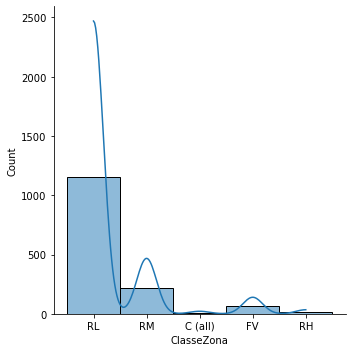

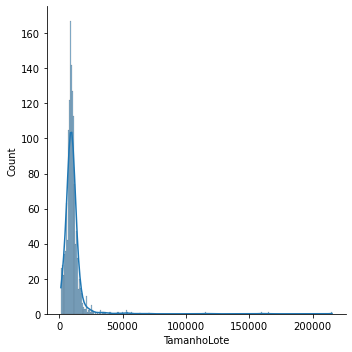

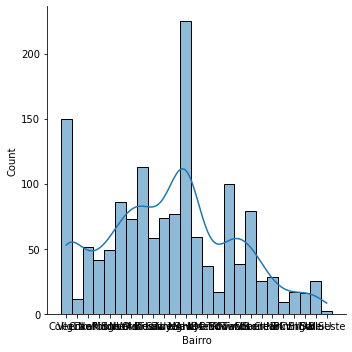

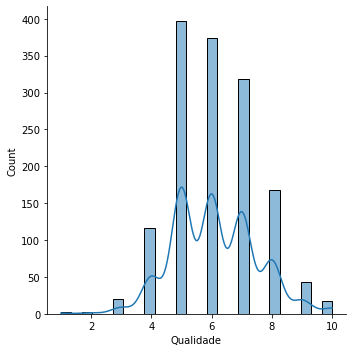

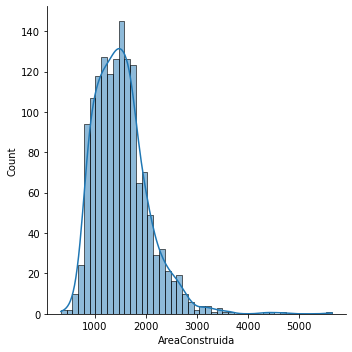

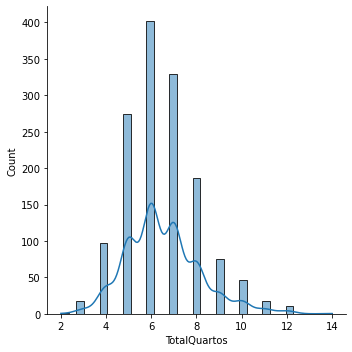

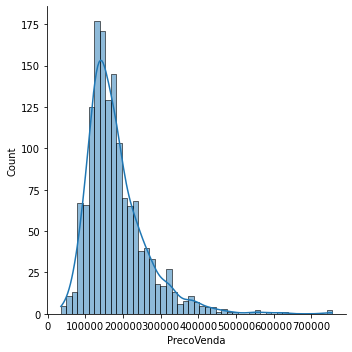

In [42]:
sns.displot(df, x="ClasseZona", kde=True)
sns.displot(df, x="TamanhoLote", kde=True)
sns.displot(df, x="Bairro", kde=True)
sns.displot(df, x="Qualidade", kde=True)
sns.displot(df, x="AreaConstruida", kde=True)
sns.displot(df, x="TotalQuartos", kde=True)
sns.displot(df, x="PrecoVenda", kde=True)
plt.show()

#### Pré-Preprocessamento, limpeza dos dados, construção de features

In [19]:
#Drop colunas com dados faltantes, essa função vai remover 19 colunas pouco relevantes
df1 = df.dropna(axis=1)
df1

,Id,ClasseImovel,ClasseZona,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,QualidadeCobertura,CondicaoExterna,TipoFundacao,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,CarrosGaragem,AreaGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


####  Objetivo 1: interpretabilidade usando uma regressão linear

In [24]:
# Filtro condição de venda = normal para diminuir o ruído dos dados
df2 = df1[(df1['CondicaoVenda'] == 'Normal')]

df2

,Id,ClasseImovel,ClasseZona,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,QualidadeCobertura,CondicaoExterna,TipoFundacao,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,CarrosGaragem,AreaGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,TA,TA,Wood,732,0,64,796,GasA,Ex,Y,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,2,480,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


C:\Users\OneMa\AppData\Local\Temp/ipykernel_14076/2783385110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["LogPrecoVenda"] = np.log(df2['PrecoVenda'])


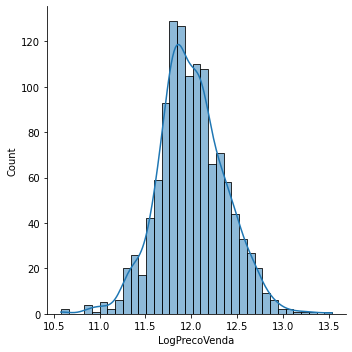

In [28]:
# Transformação logarítmica no preço de vendas
from scipy.stats import norm
df2["LogPrecoVenda"] = np.log(df2['PrecoVenda'])

sns.displot(df2, x="LogPrecoVenda", kde=True)

In [29]:
#One Hot Enconder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [30]:
#df2 = df2[['ClasseZona', 'Bairro']]
#df2 = df2.dropna()

transformer = make_column_transformer(
    (OneHotEncoder(), ['ClasseZona', 'Bairro']),
    remainder='passthrough')

transformed = transformer.fit_transform(df2)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
print(transformed_df.head())

  onehotencoder__x0_C (all) onehotencoder__x0_FV onehotencoder__x0_RH  \
0                       0.0                  0.0                  0.0   
1                       0.0                  0.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  0.0   

  onehotencoder__x0_RL onehotencoder__x0_RM onehotencoder__x1_Blmngtn  \
0                  1.0                  0.0                       0.0   
1                  1.0                  0.0                       0.0   
2                  1.0                  0.0                       0.0   
3                  1.0                  0.0                       0.0   
4                  1.0                  0.0                       0.0   

  onehotencoder__x1_Blueste onehotencoder__x1_BrDale  \
0                       0.0                      0.0   
1         

In [32]:
transformed_df.head()

,onehotencoder__x0_C (all),onehotencoder__x0_FV,onehotencoder__x0_RH,onehotencoder__x0_RL,onehotencoder__x0_RM,onehotencoder__x1_Blmngtn,onehotencoder__x1_Blueste,onehotencoder__x1_BrDale,onehotencoder__x1_BrkSide,onehotencoder__x1_ClearCr,onehotencoder__x1_CollgCr,onehotencoder__x1_Crawfor,onehotencoder__x1_Edwards,onehotencoder__x1_Gilbert,onehotencoder__x1_IDOTRR,onehotencoder__x1_MeadowV,onehotencoder__x1_Mitchel,onehotencoder__x1_NAmes,onehotencoder__x1_NPkVill,onehotencoder__x1_NWAmes,onehotencoder__x1_NoRidge,onehotencoder__x1_NridgHt,onehotencoder__x1_OldTown,onehotencoder__x1_SWISU,onehotencoder__x1_Sawyer,onehotencoder__x1_SawyerW,onehotencoder__x1_Somerst,onehotencoder__x1_StoneBr,onehotencoder__x1_Timber,onehotencoder__x1_Veenker,Id,ClasseImovel,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,QualidadeCobertura,CondicaoExterna,TipoFundacao,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,CarrosGaragem,AreaGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,LogPrecoVenda
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,60,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,12.247694
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,20,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,12.109011
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,60,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,12.317167
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,60,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,12.429216
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,50,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,TA,TA,Wood,732,0,64,796,GasA,Ex,Y,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,2,480,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,11.8706


#### Correlação de Pearson

In [ ]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df2.LogPrecoVenda, df2.Qualidade)
msg = "Correlação entre Preço Venda-Qualidade: {}\n P-value: {}\n"
print(msg.format(r1, p1))

r2, p2 = pearsonr(df2.LogPrecoVenda, df2.TamanhoLote)
msg = "Correlação entre Preço Venda-Tamanho Lote: {}\n P-value: {}\n"
print(msg.format(r2, p2))

r3, p3 = pearsonr(df2.LogPrecoVenda, df2.AreaConstruida)
msg = "Correlação entre Preço Venda-Area Construida: {}\n P-value: {}\n"
print(msg.format(r3, p3))

r4, p4 = pearsonr(df2.LogPrecoVenda, df2.TotalQuartos)
msg = "Correlação entre Preço Venda-Total Quartos: {}\n P-value: {}\n"
print(msg.format(r4, p4))

Correlação entre Preço Venda-Qualidade: 0.8080711700628369
 P-value: 3.8732220841071496e-277

Correlação entre Preço Venda-Tamanho Lote: 0.2744502407061321
 P-value: 3.8216388030822226e-22

Correlação entre Preço Venda-Area Construida: 0.732721262501852
 P-value: 3.8213435662323794e-202

Correlação entre Preço Venda-Total Quartos: 0.5347663518892548
 P-value: 1.4273302042941811e-89



#### Regressão linear simples

In [36]:
import statsmodels.formula.api as smf

modelo_ls1 = smf.ols(formula = 'LogPrecoVenda ~ Qualidade', data=df2).fit()
modelo_ls1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LogPrecoVenda   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2250.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          3.87e-277
Time:                        14:59:49   Log-Likelihood:                 135.85
No. Observations:                1198   AIC:                            -267.7
Df Residuals:                    1196   BIC:                            -257.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6541      0.029    365.449      0.000      10.597      10.711
Qualidade      0.2249      0.005     47.439      0.000       0.216       0.234
==============================================================================
Omnibus:                       36.136   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.194
Skew:                          -0.235   Prob(JB):                     3.12e-14
Kurtosis:                       4.013   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regressão linear múltipla


In [35]:
df2.select_dtypes(include=['int64', 'float64']).corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,Id,ClasseImovel,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda,LogPrecoVenda
Id,1.000000,0.021128,-0.041924,-0.026901,-0.011361,-0.026086,-0.029150,-0.010414,-0.016279,-0.010861,-0.028587,0.005277,0.030218,-0.025663,0.027607,-0.000398,-0.020612,0.010247,0.026500,0.061223,0.047123,0.059596,-0.020278,0.029529,0.031224,-0.035551,0.009691,0.030278,-0.067987,0.006606,0.043337,-0.007085,0.040044,0.009407,-0.021685,-0.016931
ClasseImovel,0.021128,1.000000,-0.123579,0.058475,-0.072689,0.048499,0.051057,-0.085727,-0.062395,-0.128338,-0.246381,-0.261044,0.308072,0.020603,0.083453,-0.013149,-0.017479,0.143788,0.171687,-0.036854,0.281214,0.050758,-0.035276,-0.016616,-0.073523,-0.011971,-0.004021,-0.014104,-0.043260,-0.028534,-0.006626,-0.008479,-0.008263,-0.033792,-0.072141,-0.067370
TamanhoLote,-0.041924,-0.123579,1.000000,0.084713,-0.001393,0.001370,-0.000330,0.190825,0.101337,-0.009574,0.225511,0.274285,0.027959,0.001100,0.220135,0.156539,0.048163,0.115423,-0.002402,0.115520,-0.015330,0.164116,0.257337,0.152467,0.162218,0.168471,0.059478,-0.033531,0.019863,0.039970,0.006831,0.039491,0.013870,-0.010186,0.293654,0.274450
Qualidade,-0.026901,0.058475,0.084713,1.000000,-0.067433,0.525159,0.507083,0.195645,-0.036379,0.298468,0.494476,0.418993,0.321886,-0.020359,0.576861,0.096652,-0.039831,0.525825,0.282275,0.126570,-0.177942,0.406651,0.373642,0.564465,0.511727,0.245864,0.295193,-0.097554,0.029379,0.074931,0.011023,-0.028362,0.047115,0.001362,0.786850,0.808071
Condicao,-0.011361,-0.072689,-0.001393,-0.067433,1.000000,-0.392162,0.117021,-0.044165,0.035388,-0.118883,-0.154070,-0.136310,0.029196,0.047776,-0.067378,-0.067170,0.136526,-0.198306,-0.062472,0.000848,-0.078865,-0.041596,-0.032393,-0.183171,-0.145977,-0.004350,-0.014654,0.086029,0.017249,0.062734,0.001875,0.066373,0.028151,0.017363,-0.047430,-0.014343
AnoConstrucao,-0.026086,0.048499,0.001370,0.525159,-0.392162,1.000000,0.538968,0.268437,-0.018473,0.093641,0.362460,0.238052,0.014794,-0.169215,0.166745,0.201564,-0.032785,0.437680,0.235534,-0.057727,-0.184146,0.061482,0.120863,0.506959,0.439686,0.228707,0.165296,-0.366033,0.027483,-0.065406,0.012104,-0.029096,-0.038761,0.033018,0.494597,0.552317
AnoReforma,-0.029150,0.051057,-0.000330,0.507083,0.117021,0.538968,1.000000,0.118609,-0.031568,0.126731,0.239400,0.190305,0.150628,-0.068569,0.260254,0.128274,0.001607,0.402053,0.173089,-0.035760,-0.170303,0.159558,0.078060,0.376325,0.320064,0.221511,0.206356,-0.174049,0.034649,-0.041796,0.004369,-0.003295,-0.009017,0.086002,0.476759,0.525216
AreaAcabPorao1,-0.010414,-0.085727,0.190825,0.195645,-0.044165,0.268437,0.118609,1.000000,-0.048660,-0.503584,0.470889,0.381562,-0.170825,-0.077156,0.116504,0.636784,0.076738,0.042192,-0.022036,-0.092717,-0.131969,-0.018535,0.231007,0.226096,0.273170,0.222771,0.098282,-0.118098,0.007599,0.061703,0.026292,0.005880,-0.006748,-0.011557,0.402999,0.392725
AreaAcabPorao2,-0.016279,-0.062395,0.101337,-0.036379,0.035388,-0.018473,-0.031568,-0.048660,1.000000,-0.209066,0.144668,0.106470,-0.114244,0.017625,-0.021664,0.184154,0.062700,-0.067726,-0.033568,-0.025724,-0.035399,-0.034082,0.037757,-0.026834,-0.000662,0.068275,-0.023715,-0.003514,-0.030183,0.060958,0.069477,0.003998,-0.008616,0.045805,0.017308,0.025121
AreaInacabPorao,-0.010861,-0.128338,-0.009574,0.298468,-0.118883,0.093641,0.126731,-0.503584,-0.209066,1.000000,0.443958,0.339860,0.020886,0.027400,0.263265,-0.408866,-0.093811,0.278395,-0.040505,0.175182,0.058403,0.262631,0.059024,0.183686,0.142733,-0.007564,0.114683,0.027388,0.030711,0.001838,-0.036546,-0.019622,-0.001189,0.014880,0.204074,0.209533
